<a href="https://colab.research.google.com/github/Soumyajyotidutta/MLProjects/blob/main/OlympicsDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns

Read dataset

In [214]:
teams = pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


Remove the unnecessary columns


In [215]:
teams = teams[["team", "country", "year","athletes","age" ,"medals", "prev_medals"]]
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


Check for linear correlations

In [216]:
teams.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
medals         1.000000
prev_medals    0.920048
Name: medals, dtype: float64

Plot the data (Using correlation between the values of "athletes" and "medals")

*Linear correlation between "athletes" and "medals" 
Add confidence interval removing 'ci' as an attribute*

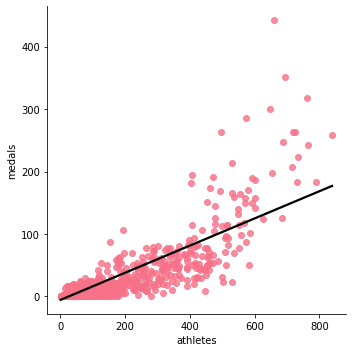

In [250]:
sns.set_palette("husl")
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, line_kws={'color': 'Black'}, ci = None)

*Non-linear correlation between "age" and "medals" Add confidence interval removing 'ci' as an attribute*

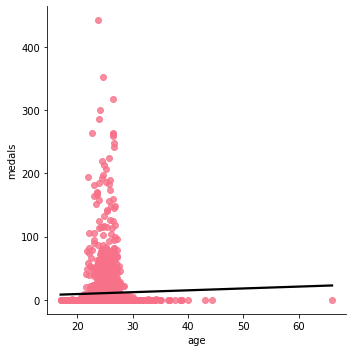

In [218]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, line_kws={'color': 'black'}, ci = None)

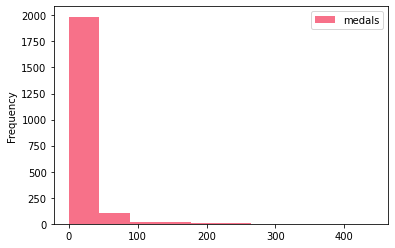

In [219]:
teams.plot.hist(y="medals")

Check for rows that contain null values (No participation)

In [220]:
teams [teams.isnull().any(axis=1)]

,team,country,year,athletes,age,medals,prev_medals
19,ALB,Albania,1992,9,25.3,0,NaN
26,ALG,Algeria,1964,7,26.0,0,NaN
39,AND,Andorra,1976,3,28.3,0,NaN
50,ANG,Angola,1980,17,17.4,0,NaN
59,ANT,Antigua and Barbuda,1976,17,23.2,0,NaN
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,0,NaN
2103,YAR,North Yemen,1984,3,27.7,0,NaN
2105,YEM,Yemen,1992,8,19.6,0,NaN
2112,YMD,South Yemen,1988,5,23.6,0,NaN


Drop rows with null values


In [221]:
teams = teams.dropna()
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


Prepare training dataset and test dataset

In [222]:
train_data = teams[teams["year"] < 2012].copy()
test_data = teams[teams["year"] >= 2012].copy()

In [223]:
test_data

,team,country,year,athletes,age,medals,prev_medals
6,AFG,Afghanistan,2012,6,24.8,1,1.0
7,AFG,Afghanistan,2016,3,24.7,0,1.0
24,ALB,Albania,2012,10,25.7,0,0.0
25,ALB,Albania,2016,6,23.7,0,0.0
37,ALG,Algeria,2012,39,24.8,1,2.0
...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


In [224]:
train_data.shape

(1609, 7)

In [225]:
test_data.shape

(405, 7)

Initialize the predictors and target 

In [226]:
predictors = ["athletes", "prev_medals"]
target = "medals"

Import ML library - sklearn

In [227]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [228]:
reg.fit(train_data[predictors], train_data["medals"])

LinearRegression()

Prediction

In [229]:
predictions = reg.predict(test_data[predictors])
test_data["predictions"] = predictions
test_data

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,-0.961221
7,AFG,Afghanistan,2016,3,24.7,0,1.0,-1.176333
24,ALB,Albania,2012,10,25.7,0,0.0,-1.425032
25,ALB,Albania,2016,6,23.7,0,0.0,-1.711847
37,ALG,Algeria,2012,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0,0.0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0,0.0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,1.505767


In [230]:
test_data.loc[test_data["predictions"] < 0, "predictions"] = 0

In [231]:
test_data["predictions"] = test_data["predictions"].round()

In [232]:
test_data

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,0.0
7,AFG,Afghanistan,2016,3,24.7,0,1.0,0.0
24,ALB,Albania,2012,10,25.7,0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,1,2.0,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,2.0


Error detection

In [233]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test_data["medals"], test_data["predictions"])
error

3.2987654320987656

In [234]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [235]:
test_data[test_data["team"] == "USA"]

,team,country,year,athletes,age,medals,prev_medals,predictions
2053,USA,United States,2012,689,26.7,248,317.0,285.0
2054,USA,United States,2016,719,26.4,264,248.0,236.0


In [236]:
test_data[test_data["team"] == "AUS"]

,team,country,year,athletes,age,medals,prev_medals,predictions
115,AUS,Australia,2012,514,26.3,114,149.0,147.0
116,AUS,Australia,2016,518,26.6,82,114.0,121.0


In [237]:
test_data[test_data["team"] == "IND"]

,team,country,year,athletes,age,medals,prev_medals,predictions
907,IND,India,2012,95,26.0,6,3.0,7.0
908,IND,India,2016,130,26.1,2,6.0,12.0


In [238]:
errors = (test_data["medals"] - test_data["predictions"]).abs()

In [239]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [240]:
errorByTeam = errors.groupby(test_data["team"]).mean()

In [241]:
errorByTeam

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [242]:
medalCountByTeam = test_data["medals"].groupby(test_data["team"]).mean()

In [243]:
medalCountByTeam

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [244]:
errorRatio = errorByTeam / medalCountByTeam

In [245]:
errorRatio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

Drop rows containing null (0/0) and infinite values

In [246]:
errorRatio[~pd.isnull(errorRatio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [247]:
errorRatio = errorRatio[np.isfinite(errorRatio)]
errorRatio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

Histogram

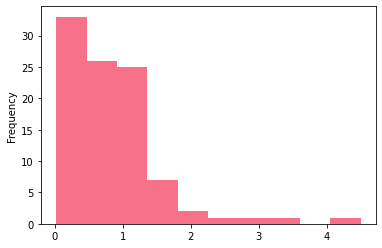

In [248]:
errorRatio.plot.hist()

Model performs better for the countries with more participation of athletes (FRA: 0.02 whereas POR: 3.33)

In [249]:
errorRatio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64